# Spatial Data Visualization
---

### Introduction

🌇In this lab, you'll learn how to visualize various types of data.

What you'll learn from this lab:
- The fundamentals of data visualization principles and tools.
- Techniques for mapping spatial, temporal, and demographic urban data.

> **I believe that visualization is one of the most powerful means of achieving personal goals**.
>
> — Harvey Mackay


🔔 Question: A quick question to help you understand better.

🥊 Challenge: Interactive exercise. We'll work through these in the lab!

💡 Tip: How to do something a bit more efficiently or effectively.

📖 Documentation: Links to official documentation or additional reading materials to deepen your understanding.


## 1. Getting Started

🔔 Question: Can you list some data types that you have seen before?

📖 Documentation:

[Matplotlib: A comprehensive library for creating static, animated, and interactive visualizations](https://matplotlib.org/)

[Seaborn: statistical data visualization](https://seaborn.pydata.org/index.html#)


#### Data Types and Formats

Tabular Data: CSV, Excel (e.g., Census, GTFS).

Spatial Data: GeoJSON, Shapefiles, WKT (e.g., City boundaries).

Time-Series Data: CSV, JSON, or database tables with timestamp columns(e.g., ERA5).

API Data: JSON responses (e.g., Yelp APIs, Google Maps APIs).

Static Visualizations: Bar charts, line plots, scatter plots, and histograms using Matplotlib or Seaborn.


In [1]:
from IPython.display import Image, IFrame

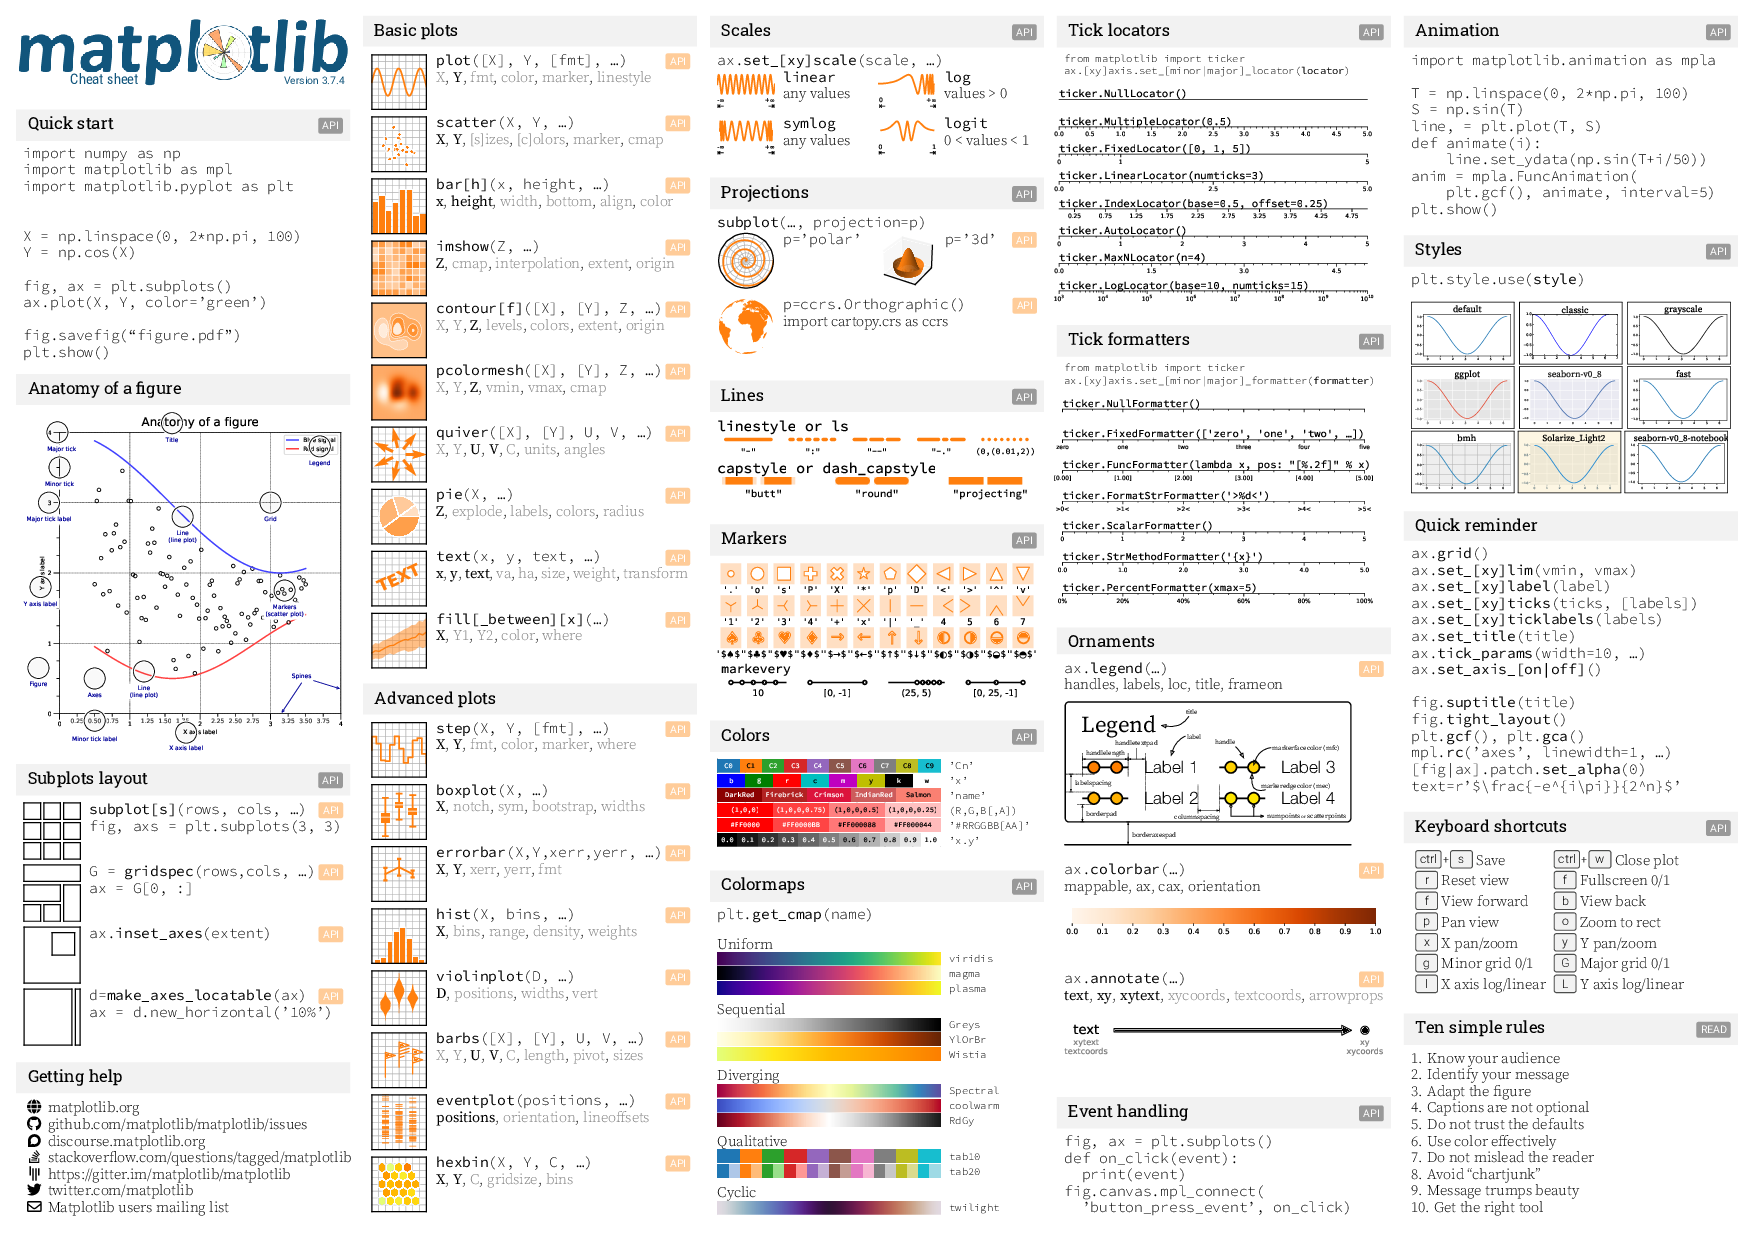

In [2]:
# A Matplotlib Cheatsheet
Image('https://matplotlib.org/cheatsheets/_images/cheatsheets-1.png',width=900)

💡 Tip: Color palette choices

Broadly, palettes fall into one of three categories:

- Qualitative palettes, good for representing categorical data

- Sequential palettes, good for representing numeric data

- Diverging palettes, good for representing numeric data with a categorical boundary

[![App Platorm](https://miro.medium.com/v2/resize:fit:720/format:webp/0*HYezsn7KKZssUoPc.png)](https://www.google.com/url?sa=i&url=https%3A%2F%2Fmedium.com%2F%40mokkup%2Fhow-to-select-colors-for-data-visualizations-75423140c554&psig=AOvVaw31Z-mDjStIjb6PgYJVbjZ7&ust=1738777952616000&source=images&cd=vfe&opi=89978449&ved=0CBQQjRxqFwoTCODAzvPKqosDFQAAAAAdAAAAABAQ)


Confused about how to choose color palattes? Check out more info in this link: https://seaborn.pydata.org/tutorial/color_palettes.html

💡 Tip: Accessible palettes for color blindness

1. Avoid red, especially with green

2. Use pre-existing colorblind safe palettes

3. Avoid rainbows color maps

[Coloring for Colorblindness](https://davidmathlogic.com/colorblind/#%23D81B60-%231E88E5-%23FFC107-%23004D40)



In [4]:
IFrame("https://davidmathlogic.com/colorblind/#%23D81B60-%231E88E5-%23FFC107-%23004D40", 900,500)

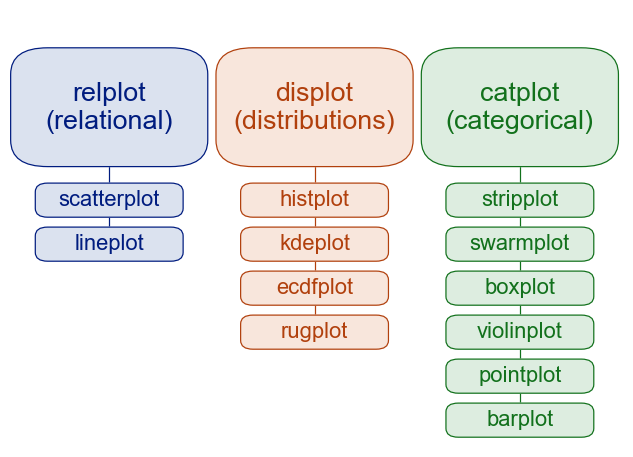

In [ ]:

Image('https://seaborn.pydata.org/_images/function_overview_8_0.png',width=400)

#### Bar Charts

🔔 Question: What are the differences between a bar chart and a histogram?

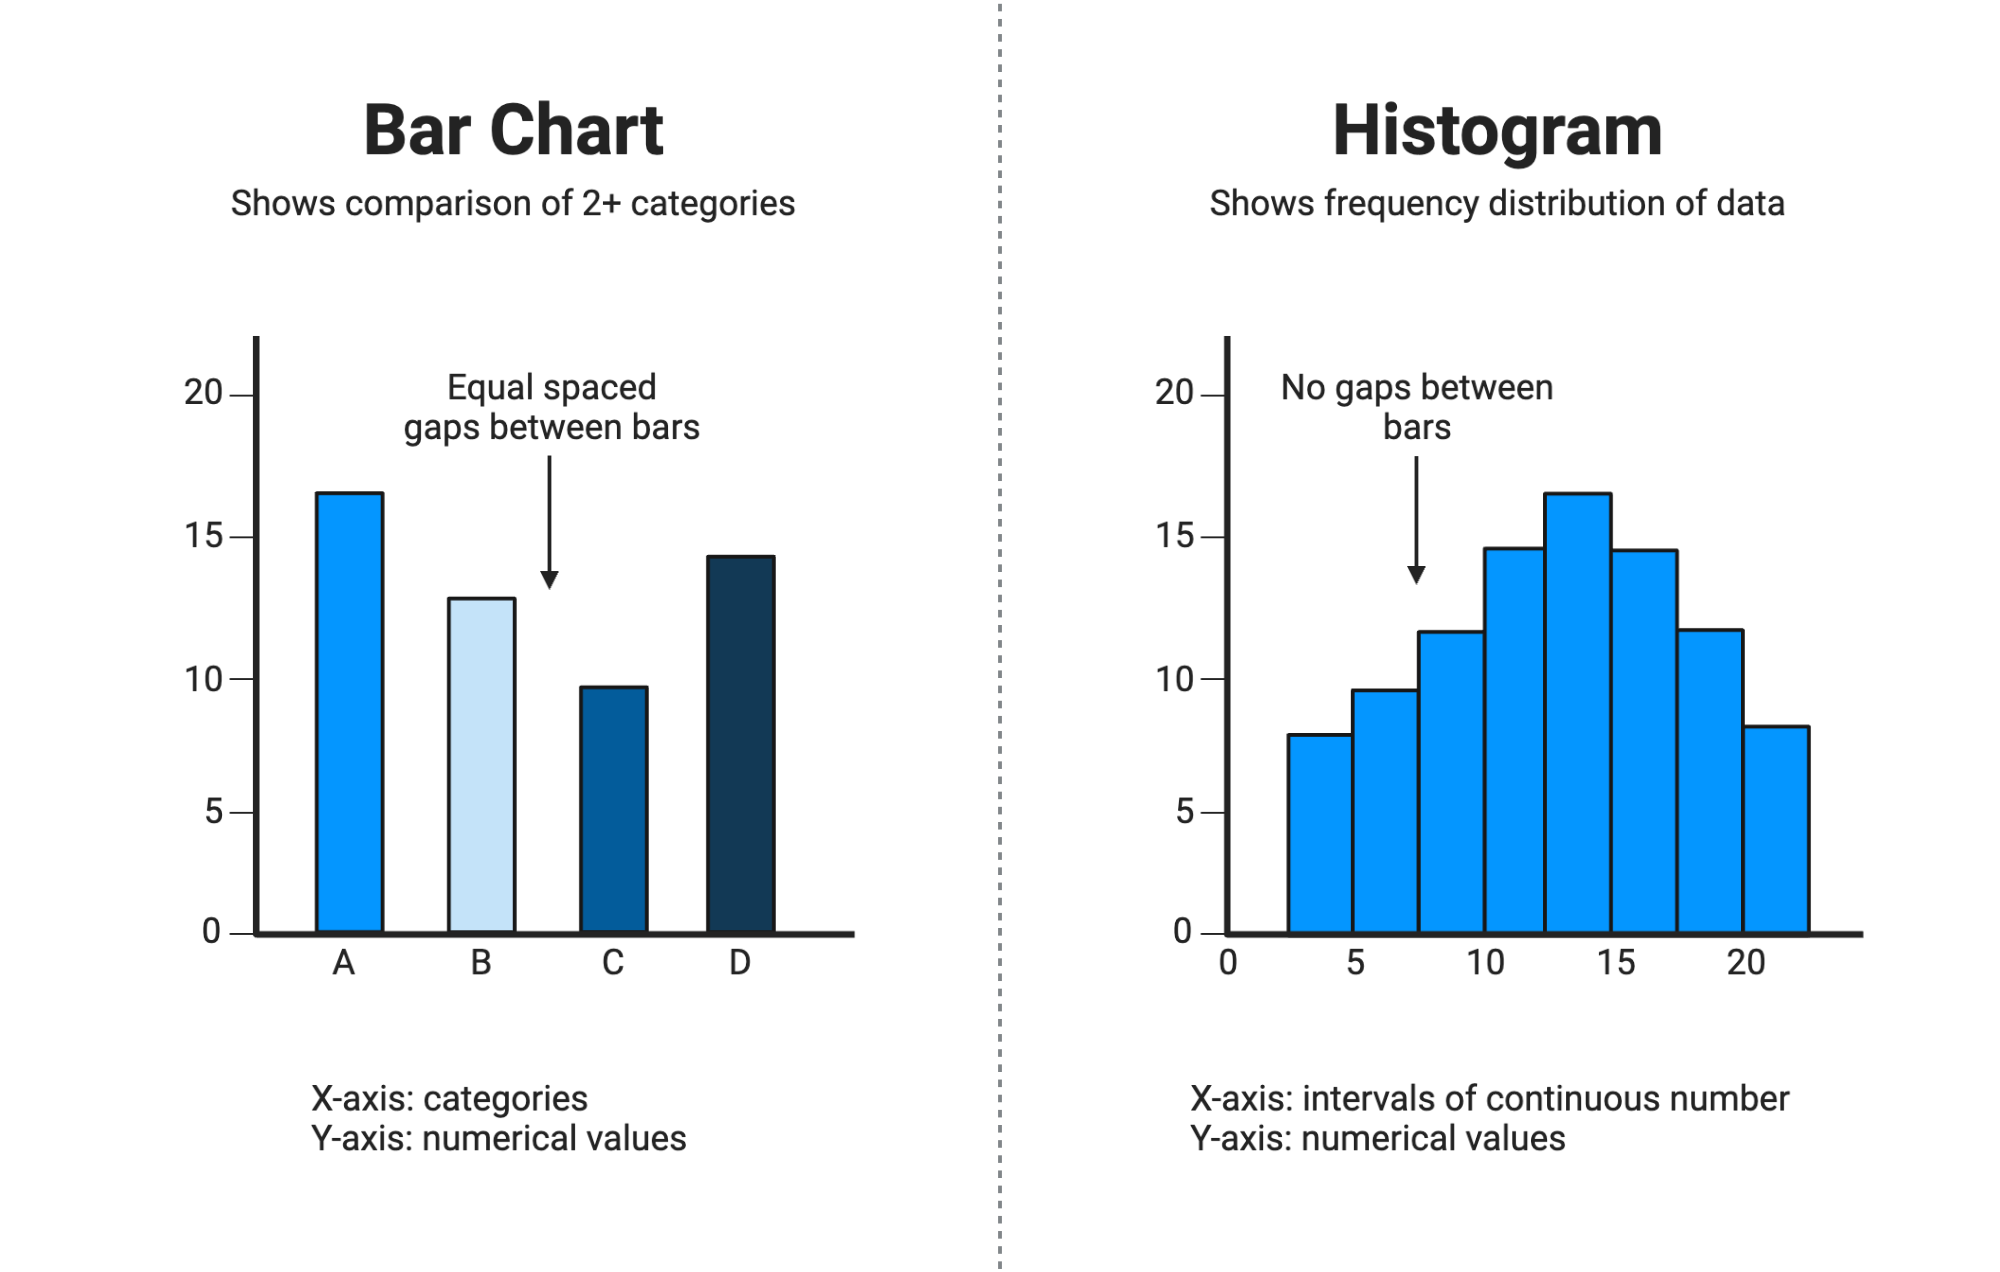

In [ ]:
Image('https://cdn.prod.website-files.com/621e95f9ac30687a56e4297e/64adca5e00190e5600663e82_V2_1681695077683_c21ca738-a949-4f27-aafa-35e662ddb9cf_HIGH_RES.png',width=700)

🥊 Challenge: Targeting Over-weighted Penguins with Bar Charts 🐧

💡 Tip: The Penguins Dataset

The Penguins dataset provides measurements for three species of penguins. It includes features such as species of the penguin, island where the penguin was observed, bill length, bill depth, flipper length, body mass, and sex of the penguin.

`species`: Species of the penguin (categorical)

`island`: Island where the penguin was observed (categorical)

`bill_length_mm`: Bill length in mm (numerical)

`bill_depth_mm`: Bill depth in mm (numerical)

`flipper_length_mm`: Flipper length in mm (numerical)

`body_mass_g`: Body mass in grams (numerical)

`sex`: Sex of the penguin (categorical)

In [ ]:
!pip install plotly-geo earthpy meteostat eomaps prophet pydeck --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 559.4/559.4 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 14.0 MB/s eta 0:00:00


In [ ]:
# import all libraries!


import os # provide functions to interact with the operating system(eg. manage files and directories)
import requests # make HTTP requests (like fetching data from websites)

import pandas as pd # for fundamental for data manipulation and analysis
import numpy as np # for numerical operations
import geopandas as gpd # extends pandas to work with geospatial data

import matplotlib as mpl # creating static, animated, and interactive visualizations
import matplotlib.pyplot as plt

import plotly.express as px # creating interactive visualizations
import seaborn as sns # Seaborn builds on matplotlib to create more statistically informative and visually appealing plots

from eomaps import Maps # creating and customizing interactive maps with geographical data

import earthpy as et # for geospatial data access, manipulation, and analysis
import earthpy.spatial as es
import earthpy.plot as ep
import rasterio as rio # ead and write geospatial raster data formats

import folium # creating interactive maps that can be displayed in web browsers

from datetime import datetime
from meteostat import Point, Daily # access historical weather data

# Prophet library is a time series forecasting tool developed by Meta
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

import pydeck as pdk # for creating 3D and geospatial visualizations




In [ ]:
penguins = sns.load_dataset("penguins")
print(penguins.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


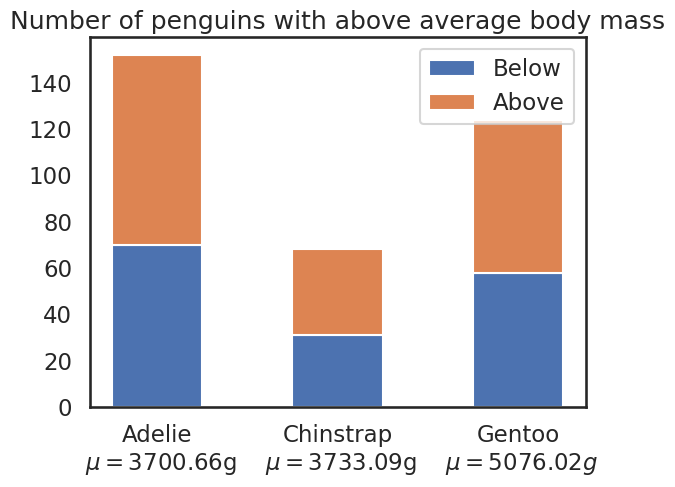

In [ ]:

# data from https://allisonhorst.github.io/palmerpenguins/

# Data Preparation
# penguin species (Adelie, Chinstrap, and Gentoo) and average weight (\\mu) for each species.
species = (
    "Adelie\n $\\mu=$3700.66g",
    "Chinstrap\n $\\mu=$3733.09g",
    "Gentoo\n $\\mu=5076.02g$",
)

# This dictionary stores the data for the bar chart.
# Two keys, "Below" and "Above", representing penguins🐧 with body mass below and above average, respectively.
# Values are NumPy arrays containing the counts for each species
weight_counts = {
    "Below": np.array([70, 31, 58]),
    "Above": np.array([82, 37, 66]),
}
width = 0.5

# Creating the Bar Chart

# create a figure (fig) and an axes object (ax), the basic elements of a Matplotlib plot
fig, ax = plt.subplots()

# initialize an array of zeros that will be used to stack the bars
bottom = np.zeros(3)

# for loop iterates through the weight_counts dictionary
for boolean, weight_count in weight_counts.items():
    p = ax.bar(species, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

# ax.bar(...): function creates the bars for each category ("Below" and "Above").
#### species: Provides the x-axis positions
#### weight_count: Provides the bar heights
#### width: Sets the bar width
#### label: Sets the label for the legend
#### bottom: Specifies the starting position for stacking

#  Set the title and legend of the chart
ax.set_title("Number of penguins with above average body mass")
ax.legend(loc="upper right")

plt.show()

# to save the fig, uncomment the line below:
# plt.savefig('bar_chart.png')




📖 Documentation: [Matplotlib - Bar Stacked](https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html)

📖 Documentation: [Mastering the Bar Plot in Python Notebook](https://colab.research.google.com/github/Tanu-N-Prabhu/Python/blob/master/Mastering_the_Bar_Plot_in_Python.ipynb#scrollTo=LHLH7pa7kK_3)


🥊 Challenge: Visualizing Population by each Contient with an Interactive Bar Chart

In [ ]:
# import plotly.express as px

# Using a sample dataset from Plotly
# Load and filter data
df = px.data.gapminder().query("year == 2007")

#### px.data.gapminder(): loads a built-in "gapminder" dataset, containing countries' information over time
#### .query("year == 2007") filters this dataset to include only data from the year 2007.

# Create the bar chart
fig = px.bar(df,
             x='continent', # Set x-axis to represent the 'continent' column
             y='pop', # Set y-axis to represent the 'pop' (population) column
             color='continent', # colors the bars based on the 'continent' column
             hover_name='country', # display name of the country when hovering
             title='Population by Continent in 2007')

fig.show()

# to save the fig, uncomment the line below:
# plt.savefig('population_by_continent.png')


📖 Documentation: [Bar Plot Tutorial](https://www.datacamp.com/tutorial/python-bar-plot)

#### Line Charts


🥊 Challenge: Visualizing Penguins' Bill Info with Line Charts 🐧

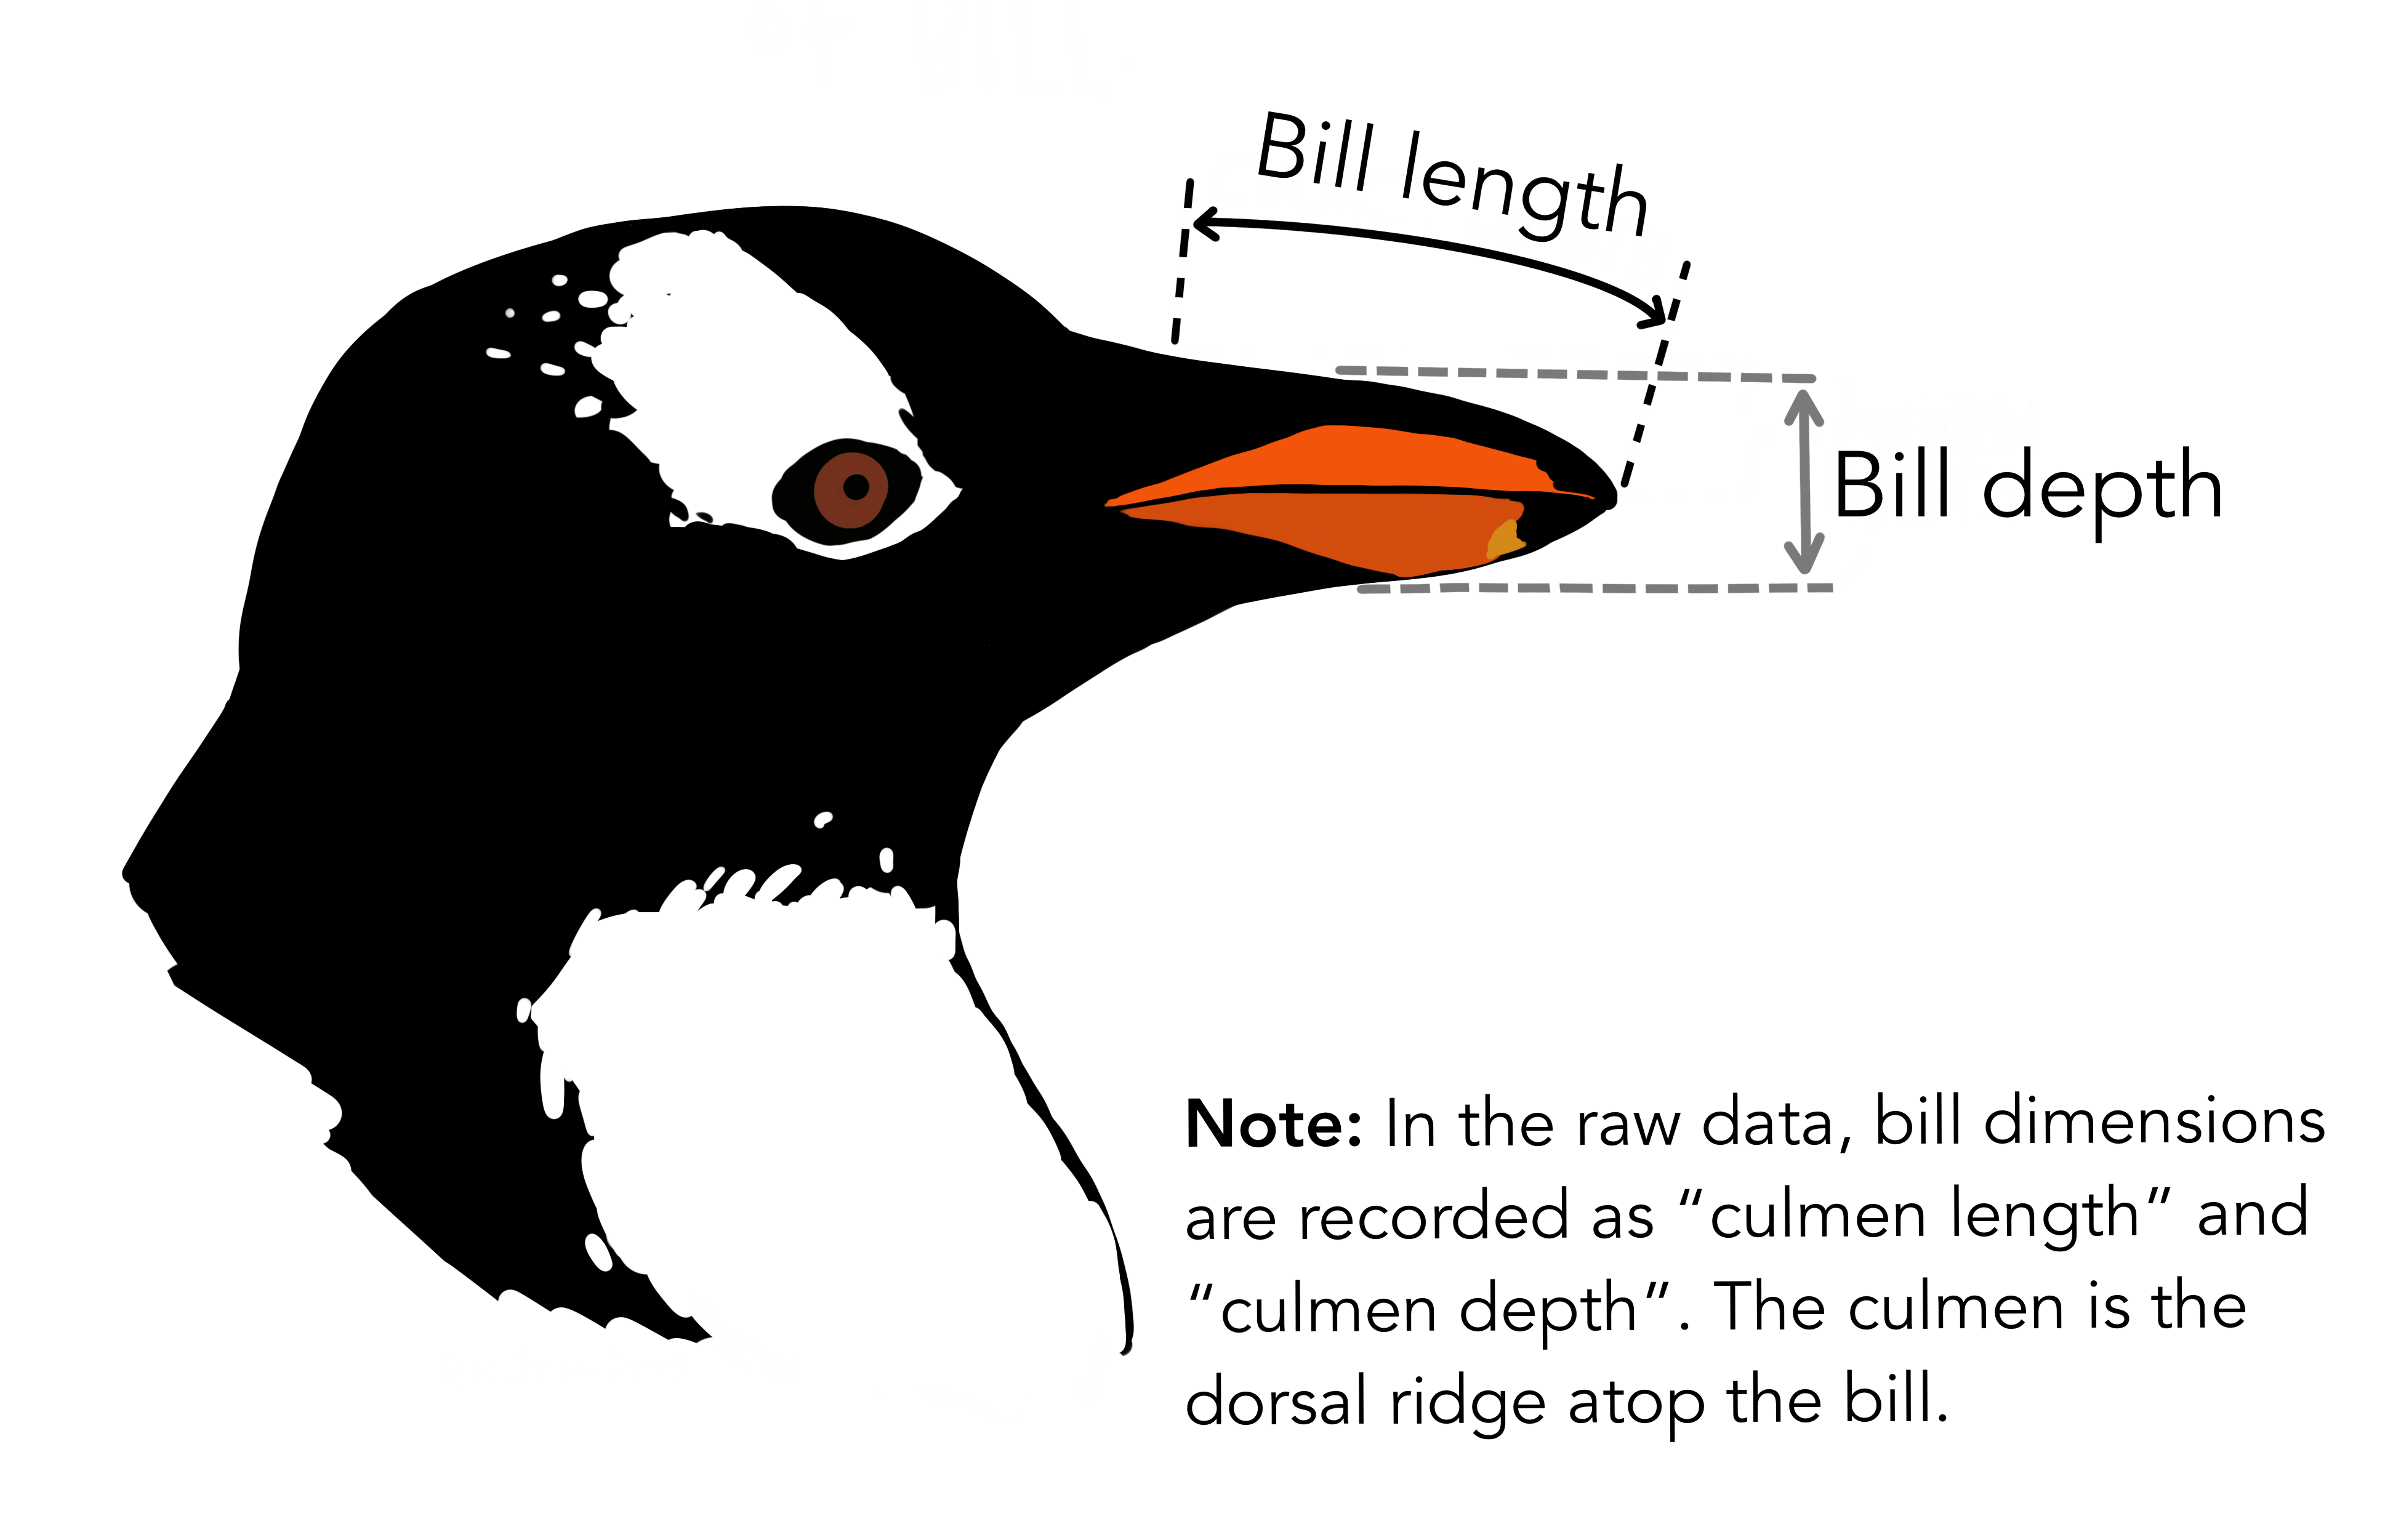

In [ ]:
Image('https://allisonhorst.github.io/palmerpenguins/reference/figures/culmen_depth.png', width=400)

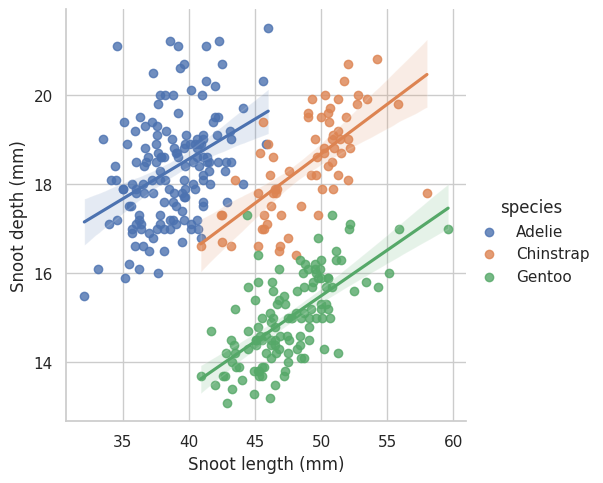

In [ ]:
# import seaborn as sns

# Set the plot context and style
sns.set_style("whitegrid")
sns.set_context("notebook", # display plots in a Jupyter notebook
                rc={"lines.linewidth": 1.5} # make lines in the plot a bit thicker
                )


# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Create the plot
g = sns.lmplot(
    data=penguins,
    x="bill_length_mm", # set bill length as x-axis
    y="bill_depth_mm", # set bill depth as y-axis
    hue="species", # colors the points based on the penguin specie
    height=5 # control the height of the plot
)

# customize the x and y-axis labels
g.set_axis_labels("Snoot length (mm)", "Snoot depth (mm)")



📖 Documentation: [Seaborn - Multiple Regression](https://seaborn.pydata.org/examples/multiple_regression.html#)

📖 Documentation: [Seaborn - Set Theme Examples](https://seaborn.pydata.org/generated/seaborn.set_theme.html)

📖 Documentation: [Seaborn - Controlling figure aesthetics](https://seaborn.pydata.org/tutorial/aesthetics.html)

📖 Documentation: [Seaborn - Color Palettes](https://seaborn.pydata.org/tutorial/color_palettes.html)

#### Scatter Plots

🥊 Challenge: Plotting Bills and Tips 💸 with Scatter Plots

[Text(0.5, 19.049999999999997, 'Penguins Body Mass(g)')]

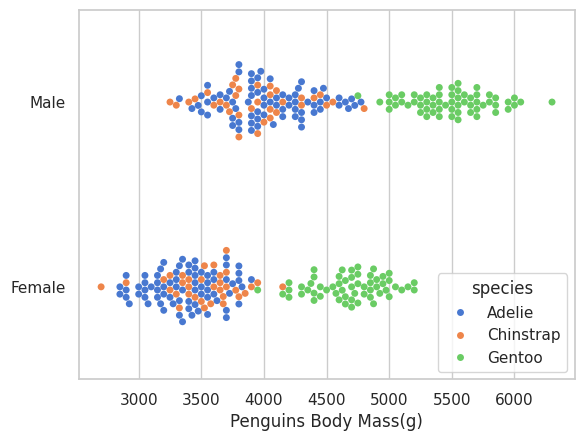

In [ ]:
# import seaborn as sns
sns.set_theme(style="whitegrid", palette="muted")

# Load the penguins dataset
df = sns.load_dataset("penguins")

# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=df,
                   x="body_mass_g",
                   y="sex",
                   hue="species")


# set ylabel to an empty string, hiding the y-axis label, for better layout
# try to comment it and see comparison!
ax.set(ylabel="")

# rename xlabel from "body_mass_g"
ax.set(xlabel="Penguins Body Mass(g)")


🥊 Challenge: 🚛 Visualizing the Relationship Between Cars' Horsepower, Fuel Efficiency (mpg), and Acceleration 🏎 🚗

💡 Tip: The MPG Dataset

The MPG dataset contains information about miles per gallon for different car models and their attributes.

It includes features such as miles per gallon, number of cylinders in the engine, engine displacement, engine horsepower, vehicle weight, acceleration, model year, origin of the car, and car model name.



In [ ]:
# set plot theme
sns.set_theme(style="white")

# Load the example mpg dataset
mpg = sns.load_dataset("mpg")

print(mpg.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  


`mpg`: Miles per gallon (numerical)

`cylinders`: Number of cylinders in the engine (numerical)

`displacement`: Engine displacement in cubic inches (numerical)

`horsepower`: Engine horsepower (numerical)

`weight`: Vehicle weight in pounds (numerical)

`acceleration`: Acceleration in seconds from 0 to 60 mph (numerical)

`model_year`: Model year (categorical)

`origin`: Origin of the car (1 = American, 2 = European, 3 = Japanese) (categorical)

`name`: Car model name (string)

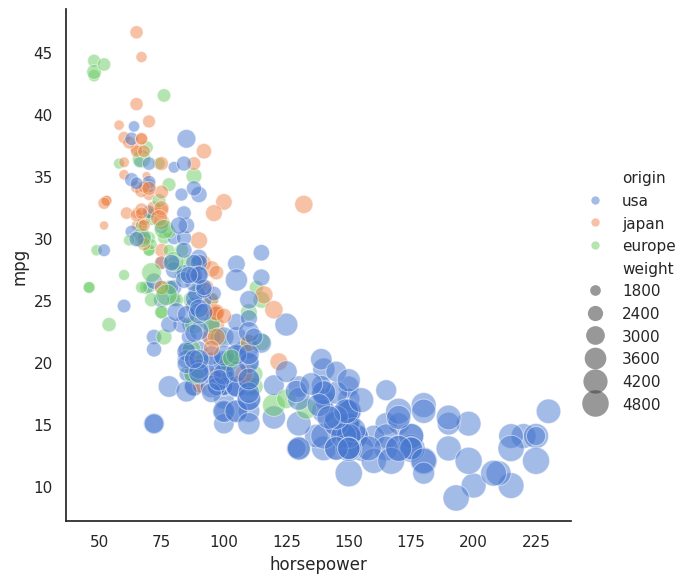

In [ ]:
# Create relational plot(most commonly scatter plots)
sns.relplot(data=mpg,
            x="horsepower",
            y="mpg",
            hue="origin", # Colors based on the car's origin (e.g., USA, Europe, Japan), visually distinguish between different categories
            size="weight", # Size of the points based on cars' weight
            sizes=(40, 400),
            alpha=.5, # set the transparency of the points to 50%, making overlapping points easier to see.
            palette="muted", # use color palette "muted"
            height=6, # Control plot height
            )

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1766: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  f.tight_layout()


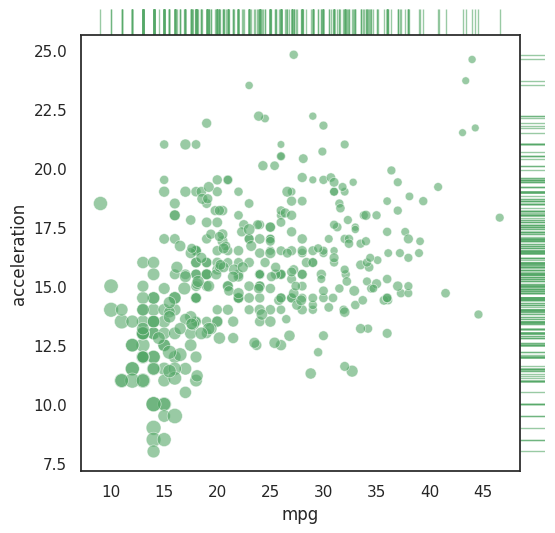

In [ ]:
# set plot theme
sns.set_theme(style="white", color_codes=True)

# load dataset
mpg = sns.load_dataset("mpg")

# Use JointGrid directly to draw a custom plot
g = sns.JointGrid(data=mpg,
                  x="mpg",
                  y="acceleration",
                  space=0,
                  ratio=17)

# create scatter plot
g.plot_joint(sns.scatterplot,
             size=mpg["horsepower"],
             sizes=(30, 120),
             color="g",
             alpha=.6,
             legend=False)

# Add rug plot
# A rug plot displays data points as small vertical lines along an axis
g.plot_marginals(sns.rugplot, height=1, color="g", alpha=.6)

📖 Documentation: [Seaborn - Scatter Bubbles Plot](https://seaborn.pydata.org/examples/scatter_bubbles.html)

📖 Documentation: [Seaborn - Marginal Ticks](https://seaborn.pydata.org/examples/marginal_ticks.html)

🥊 Challenge: ⭐ Visualizing the Planet Discovery: Orbital Period and Distance 📡

💡 Tip: The Planets dataset

The Planets dataset includes information about exoplanets, such as their orbital periods and masses. It includes features such as method of detecting the exoplanet, number of planets in the system, orbital period, mass of the planet, and distance from Earth.

`method`: Method of detecting the exoplanet (categorical)

`number`: Number of planets in the system (numerical)

`orbital_period`: Orbital period in Earth days (numerical)

`mass`: Mass of the planet in Jupiter masses (numerical)

`distance`: Distance from Earth in light-years (numerical)

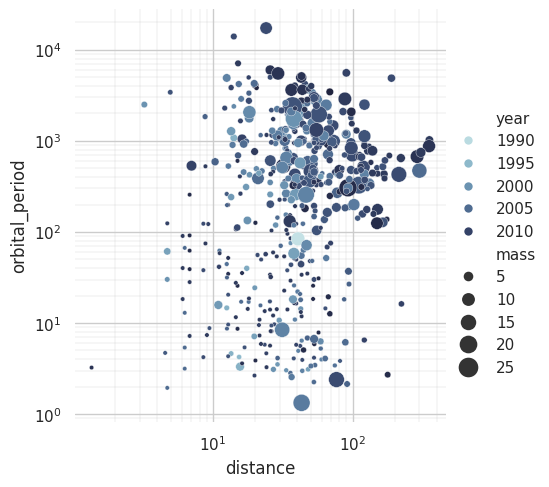

In [ ]:
# set plot theme
sns.set_theme(style="whitegrid")

# Load the example planets dataset
planets = sns.load_dataset("planets")

# defines a color palette with cubehelix_palette function
# as_cmap=True ensures the palette is treated as a continuous colormap
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

# Create relational plot(most commonly scatter plots)
g = sns.relplot(
    data=planets,
    x="distance",
    y="orbital_period",
    hue="year",
    size="mass",
    palette=cmap,
    sizes=(10, 200), # Size range for the points(smallest points have a size of 10, and the largest have a size of 200)
)

# sets both the x-axis and y-axis to a logarithmic scale
# often useful when dealing with data that spans a wide range of values
g.set(xscale="log", yscale="log")

# add minor gridlines to the x-axis and y-axis
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)

# Remove the spines (the lines that form the border of the plot) on the left and bottom sides for a cleaner look
# try to comment it and see comparison!
g.despine(left=True, bottom=True)


📖 Documentation: [Seaborn - Scatterplot Size](https://seaborn.pydata.org/examples/scatterplot_sizes.html)

#### Histograms



📖 Documentation: [Seaborn - Visualizing Distribution](https://seaborn.pydata.org/tutorial/distributions.html)

🥊 Challenge: Visualize the Distribution of Diamond Prices with Stacked histogram 💠

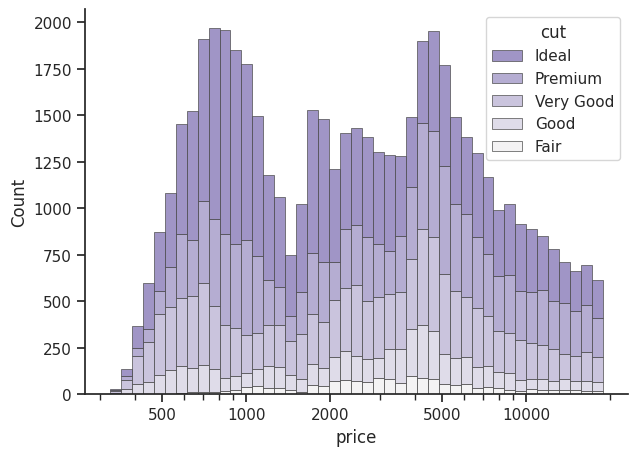

In [ ]:

# set plot theme
sns.set_theme(style="ticks")

# Load the Dataset
diamonds = sns.load_dataset("diamonds")

# Create a matplotlib figure (f) and an axes object (ax)
# set the dimensions of the figure to 7 inches wide and 5 inches tall.
f, ax = plt.subplots(figsize=(7, 5))
# Remove the top and right spines (borders) of the plot for a cleaner look.
sns.despine(f)

# create the histogram
sns.histplot(
    diamonds,
    x="price", hue="cut",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True, # Apply a logarithmic scale to the x-axis, which is useful for visualizing data with a wide range of values.
)

# Set the formatting of the x-axis tick labels to use a standard scalar format (e.g., 1000 instead of 1e3).
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
# Specify the exact locations of the tick marks on the x-axis.
ax.set_xticks([500, 1000, 2000, 5000, 10000])

📖 Documentation: [Seaborn - Stack Histogram](https://seaborn.pydata.org/examples/histogram_stacked.html)

## 2. Spatial Visualization

**Vector Data:**

Formats: Shapefiles (.shp), GeoJSON (.geojson), KML (.kml).

Tools: Geopandas, Folium, Kepler.gl.

**Raster Data (e.g., satellite imagery, heatmaps):**

Formats: GeoTIFF, PNG with georeferencing.

Tools: Rasterio, Matplotlib.


💡 Tip: Use GeoJSON files for interactive mapping in Folium.


📖 Documentation:

Matplotlib and Basemap Toolkit: Useful for basic static maps.

[Folium: Great for creating interactive Leaflet maps](https://python-visualization.github.io/folium/latest/)

[Pandas](https://pandas.pydata.org/docs/)

[PandasAI: a Python library that makes it easy to ask questions to your data in natural language](https://docs.pandas-ai.com/intro)

[GeoPandas: Extends Pandas to handle spatial data, making working with geospatial data easier](https://geopandas.org/en/stable/index.html)

[PyDeck: High-scale spatial rendering in Python](https://plotly.com/python/)

[Kepler.gl: Open source geospatial analysis tool for large-scale data sets.](https://kepler.gl/)

[Raster.io](https://rasterio.readthedocs.io/en/stable/)

[Plotly](https://plotly.com/python/): Offers interactive and high-quality visualizations.

[Bokeh](https://docs.bokeh.org/en/latest/docs/gallery.html): Ideal for creating interactive, web-ready visualizations.


Choropleth Maps:
Highlight spatial patterns (e.g., population density, crime rates).
Tools: Folium, Geopandas, Plotly.

Heatmaps:
Show density or intensity in a spatial context (e.g., traffic congestion, Wi-Fi hotspots).
Tools: Folium, Kepler.gl.





🥊 Challenge: Visualizing Earthquakes with Interactive Point Map 🗺

In [ ]:



# Import data from USGS
data = pd.read_csv('https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv')


# Drop rows with missing or invalid values in the 'mag' column
data = data.dropna(subset=['mag'])
data = data[data.mag >= 0]


# Create scatter map using the px.scatter_geo function from plotly.express
fig = px.scatter_geo(data,
                     lat='latitude',
                     lon='longitude',
                     color='mag', # colors the points on the map based on earthquake magnitude
                     hover_name='place', #  displays the name of the location when you hover over a point on the map
                     title='Earthquakes Around the World')

fig.show()


📖 Documentation: [Ploty Map](https://www.datacamp.com/tutorial/making-map-in-python-using-plotly-library-guide
)


🥊 Challenge: Visualizing American Flights with Interactive Lines Map 🗺

In [ ]:
import plotly.graph_objects as go
import pandas as pd

# load data: US airports' information
df_airports = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')
df_airports.head()


iata                            airport               city state country  \
0  ORD       Chicago O'Hare International            Chicago    IL     USA   
1  ATL  William B Hartsfield-Atlanta Intl            Atlanta    GA     USA   
2  DFW    Dallas-Fort Worth International  Dallas-Fort Worth    TX     USA   
3  PHX   Phoenix Sky Harbor International            Phoenix    AZ     USA   
4  DEN                        Denver Intl             Denver    CO     USA   

         lat        long    cnt  
0  41.979595  -87.904464  25129  
1  33.640444  -84.426944  21925  
2  32.895951  -97.037200  20662  
3  33.434167 -112.008056  17290  
4  39.858408 -104.667002  13781

In [ ]:
# flight paths including start and end locations and counts of flights on each route
df_flight_paths = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_aa_flight_paths.csv')
df_flight_paths.head()

start_lat  start_lon    end_lat     end_lon airline airport1 airport2  cnt
0  32.895951 -97.037200  35.040222 -106.609194      AA      DFW      ABQ  444
1  41.979595 -87.904464  30.194533  -97.669872      AA      ORD      AUS  166
2  32.895951 -97.037200  41.938874  -72.683228      AA      DFW      BDL  162
3  18.439417 -66.001833  41.938874  -72.683228      AA      SJU      BDL   56
4  32.895951 -97.037200  33.562943  -86.753550      AA      DFW      BHM  168

In [ ]:

# create a new plotly figure object with go.Figure()
# this figure will serve as the container for the map and all its elements
fig = go.Figure()

# add airport markers to map
fig.add_trace(go.Scattergeo(
    locationmode = 'USA-states',
    lon = df_airports['long'],
    lat = df_airports['lat'],
    hoverinfo = 'text', # show airplane name when hovering
    text = df_airports['airport'],
    mode = 'markers', # trace should be displayed as markers
    marker = dict( # customize markers appearance, setting size, color, and line properties
        size = 2,
        color = 'rgb(255, 0, 0)',
        line = dict(
            width = 3,
            color = 'rgba(68, 68, 68, 0)'
        )
    )))

# add flight paths to map
flight_paths = []
# iterate through the df_flight_paths DataFrame,
# adding a go.Scattergeo trace for each flight path
for i in range(len(df_flight_paths)):
    fig.add_trace(
        go.Scattergeo(
            locationmode = 'USA-states',
            lon = [df_flight_paths['start_lon'][i], df_flight_paths['end_lon'][i]],
            lat = [df_flight_paths['start_lat'][i], df_flight_paths['end_lat'][i]],
            mode = 'lines', # specify that the trace should be displayed as lines
            line = dict(width = 1,color = 'red'),
            # set opacity based on flight count for each path, more frequent routes appearing darker
            opacity = float(df_flight_paths['cnt'][i]) / float(df_flight_paths['cnt'].max()),
        )
    )

# customize overall map appearance(title, legend visibility, and geographical settings)
fig.update_layout(
    title_text = 'Feb. 2011 American Airline flight paths<br>(Hover for airport names)',
    showlegend = False,
    geo = dict(
        scope = 'north america',
        projection_type = 'azimuthal equal area',
        showland = True,
        landcolor = 'rgb(243, 243, 243)',
        countrycolor = 'rgb(204, 204, 204)',
    ),
)

fig.show()

# to save the interactive map as html, uncomment the line below
# fig.write_html("flight_paths.html")




🥊 Challenge: Visualizing US unemployment rate with Interactive Choropleth Map 🗺


In [ ]:

# get state boundaries
state_geo = requests.get(
    "https://raw.githubusercontent.com/python-visualization/folium-example-data/main/us_states.json"
).json()

# getting unemployment data
state_data = pd.read_csv(
    "https://raw.githubusercontent.com/python-visualization/folium-example-data/main/us_unemployment_oct_2012.csv"
)

# preview unemployment data
state_data.head(10)


State  Unemployment
0    AL           7.1
1    AK           6.8
2    AZ           8.1
3    AR           7.2
4    CA          10.1
5    CO           7.7
6    CT           8.4
7    DE           7.1
8    FL           8.2
9    GA           8.8

In [ ]:
# preview state_geo json

# Convert the GeoJSON data to a string
state_geo_str = json.dumps(state_geo)

# Print the first 1000 characters of the string
print(state_geo_str[:1000])


{"type": "FeatureCollection", "features": [{"type": "Feature", "id": "AL", "properties": {"name": "Alabama"}, "geometry": {"type": "Polygon", "coordinates": [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}, {"type": "Feature", "

In [ ]:



m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo, # geographical boundaries of US states
    name="choropleth", # layer name
    data=state_data, # unemployment data
    columns=["State", "Unemployment"], # specif columns in `state_data` containing the state names and unemployment rates.
    key_on="feature.id", # connect geographical features and unemployment data
    fill_color="BuPu", # color palette for shading the states
    fill_opacity=0.7, # transparency of the colored areas (70% opaque)
    line_opacity=0.2, # transparency of the state boundaries (20% opaque)
    legend_name="Unemployment Rate (%)", # sets title of the map's legend

).add_to(m)

folium.LayerControl().add_to(m)

m

📖 Documentation: [Folium - Getting Started](https://python-visualization.github.io/folium/latest/getting_started.html)


🥊 Challenge: Visualizing Population in Galicia (a Community in Spain) with Interactive Heat Map 🗺

In [ ]:

# Data with latitude/longitude and values
df = pd.read_csv('https://raw.githubusercontent.com/R-CoderDotCom/data/main/sample_datasets/population_galicia.csv')

df.head()


longitude   latitude  tot_pob
0  -8.296530  43.220004    916.0
1  -8.267906  43.203009    730.0
2  -8.332826  43.215882    716.0
3  -8.322086  43.173893    686.0
4  -8.262366  43.237851   1457.0

In [ ]:
# how the df is calculated to a spatial heatmap:
# Each data point (`latitude` `longitude`) is treated as the center of a small "kernel"
# population value (z, `tot_pop`) is the "weight" of each kernel.
# KDE algorithm calculates the density of overlapping kernels at every pixel on the map

# create a heatmap
fig = px.density_mapbox(df,
                        lat = 'latitude',
                        lon = 'longitude',
                        z = 'tot_pob', # use population to determine the heatmap intensity
                        radius = 8, # control the size of the circles used to represent population density (larger radius means smoother but less detailed heatmap)
                        center = dict(lat = 42.83, lon = -8.35), # initial center of the map
                        zoom = 6, # initial zoom level of the map
                        mapbox_style = 'carto-positron',
                        color_continuous_scale='armyrose' # color scheme
                        )

fig.show()

In [ ]:
# dark mode plot

fig = px.density_mapbox(df, lat = 'latitude', lon = 'longitude', z = 'tot_pob',
                        radius = 8,
                        center = dict(lat = 42.83, lon = -8.35),
                        zoom = 6,
                        mapbox_style = 'carto-darkmatter',
                        color_continuous_scale = 'plotly3',
                        opacity=0.9)
fig.show()




📖 Documentation: [Folium Heatmap](https://wellsr.com/python/plotting-geographical-heatmaps-with-python-folium-module/)

📖 Documentation: [Plotly Spatial Heatmap](https://python-charts.com/spatial/spatial-heatmap-plotly/)


Topographic map: A Hillshade From a Digital Elevation Model Using EarthPy


Extracted output to /root/earth-analytics/data/vignette-elevation/.


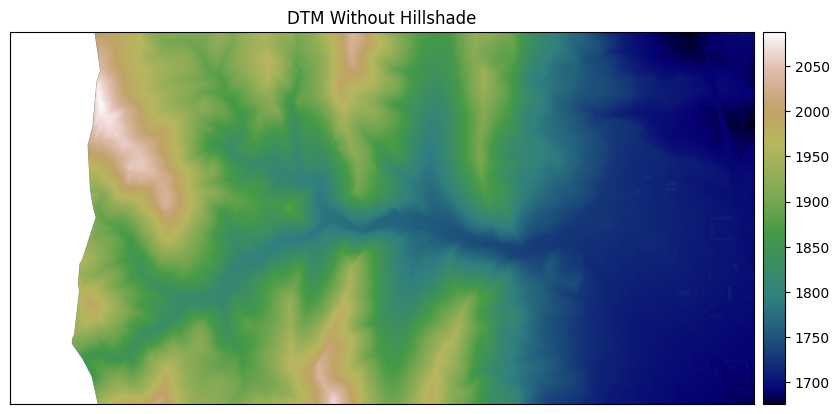

In [ ]:


# Download the data needed for this vignette
data = et.data.get_data("vignette-elevation")



# Set the home directory and get the data for the exercise
os.chdir(os.path.join(et.io.HOME, "earth-analytics"))
dtm = "data/vignette-elevation/pre_DTM.tif"

# Open the DEM with Rasterio
with rio.open(dtm) as src:
    elevation = src.read(1)
    # Set masked values to np.nan
    elevation[elevation < 0] = np.nan

# Plot the data
ep.plot_bands(
    elevation,
    cmap="gist_earth",
    title="DTM Without Hillshade",
    figsize=(10, 6),
)
plt.show()

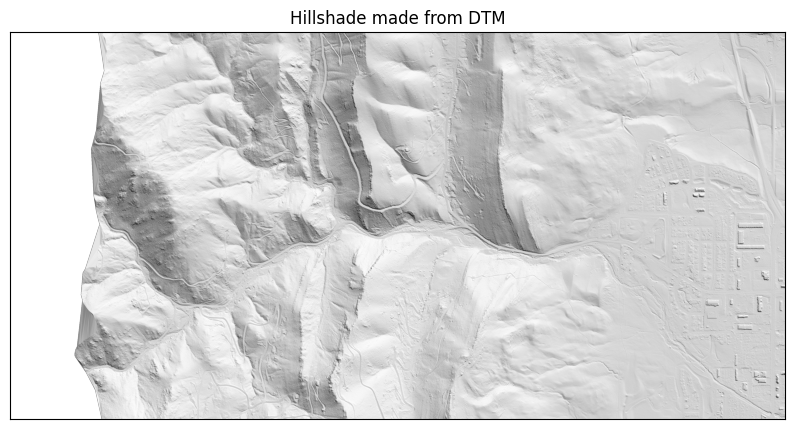

In [ ]:
# Create and plot the hillshade with earthpy
hillshade = es.hillshade(elevation)

ep.plot_bands(
    hillshade,
    cbar=False,
    title="Hillshade made from DTM",
    figsize=(10, 6),
)
plt.show()

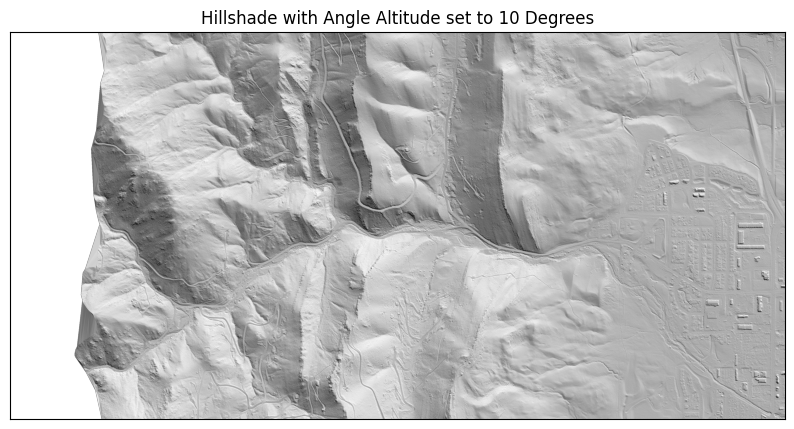

In [ ]:
# Adjust the azimuth value
hillshade_angle_10 = es.hillshade(elevation, altitude=10)

# Plot the hillshade layer with the modified angle altitude
ep.plot_bands(
    hillshade_angle_10,
    cbar=False,
    title="Hillshade with Angle Altitude set to 10 Degrees",
    figsize=(10, 6),
)
plt.show()

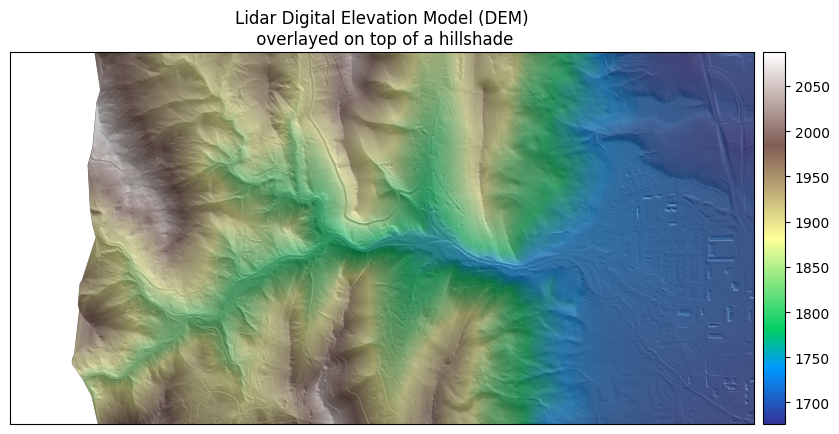

In [ ]:
# Plot the DEM and hillshade at the same time
# sphinx_gallery_thumbnail_number = 5

fig, ax = plt.subplots(figsize=(10, 6))
ep.plot_bands(
    elevation,
    ax=ax,
    cmap="terrain",
    title="Lidar Digital Elevation Model (DEM)\n overlayed on top of a hillshade",
)
ax.imshow(hillshade, cmap="Greys", alpha=0.5)
plt.show()



📖 Documentation:
[EarthPy - DEM Hillshade](https://earthpy.readthedocs.io/en/latest/gallery_vignettes/plot_dem_hillshade.html#sphx-glr-gallery-vignettes-plot-dem-hillshade-py)

📖 Documentation: [12 Methods for Visualizing Geospatial Data on a Map](https://www.safegraph.com/guides/visualizing-geospatial-data)

🥊 Challenge: Visualizing Population in Each Country over Time

In [ ]:
# load data
df = px.data.gapminder()

# let's take a look at df!
df.head(20)

country continent  year  lifeExp       pop    gdpPercap iso_alpha  \
0   Afghanistan      Asia  1952   28.801   8425333   779.445314       AFG   
1   Afghanistan      Asia  1957   30.332   9240934   820.853030       AFG   
2   Afghanistan      Asia  1962   31.997  10267083   853.100710       AFG   
3   Afghanistan      Asia  1967   34.020  11537966   836.197138       AFG   
4   Afghanistan      Asia  1972   36.088  13079460   739.981106       AFG   
5   Afghanistan      Asia  1977   38.438  14880372   786.113360       AFG   
6   Afghanistan      Asia  1982   39.854  12881816   978.011439       AFG   
7   Afghanistan      Asia  1987   40.822  13867957   852.395945       AFG   
8   Afghanistan      Asia  1992   41.674  16317921   649.341395       AFG   
9   Afghanistan      Asia  1997   41.763  22227415   635.341351       AFG   
10  Afghanistan      Asia  2002   42.129  25268405   726.734055       AFG   
11  Afghanistan      Asia  2007   43.828  31889923   974.580338       AFG   
12      Albania    Europe  1952   55.230   1282697  1601.056136       ALB   
13      Albania    Europe  1957   59.280   1476505  1942.284244       ALB   
14      Albania    Europe  1962   64.820   1728137  2312.888958       ALB   
15      Albania    Europe  1967   66.220   1984060  2760.196931       ALB   
16      Albania    Europe  1972   67.690   2263554  3313.422188       ALB   
17      Albania    Europe  1977   68.930   2509048  3533.003910       ALB   
18      Albania    Europe  1982   70.420   2780097  3630.880722       ALB   
19      Albania    Europe  1987   72.000   3075321  3738.932735       ALB   

    iso_num  
0         4  
1         4  
2         4  
3         4  
4         4  
5         4  
6         4  
7         4  
8         4  
9         4  
10        4  
11        4  
12        8  
13        8  
14        8  
15        8  
16        8  
17        8  
18        8  
19        8

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
 6   iso_alpha  1704 non-null   object 
 7   iso_num    1704 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 106.6+ KB


In [ ]:


fig = px.scatter_geo(df,
                     locations="iso_alpha",
                     color="continent",
                     hover_name="country",
                     size="pop",
                     animation_frame="year",
                     projection="natural earth"
                     )

fig.show()

📖 Documentation: [Plotly - Bubble Maps](https://plotly.com/python/bubble-maps/)


## 3. Temporal Data Visualization

Time-series visualizations using Matplotlib and Plotly.

🔔 Question: How can temporal trends in weather help city planners?

💡 Tip: Use Plotly for interactive and zoomable time-series charts.

📖 Documentation: [Plotly](https://plotly.com/python/)

Data Types and Formats
**Time-Series Data:**
Formats: CSV, JSON, or database tables.
Structure: A timestamp column with associated values value

Traffic and Public Transit Data:

Formats: CSV or JSON with `timestamp`, `location_id`, and `value` fields.

Weather Data:

Formats: API outputs in JSON (e.g., hourly temperature, air quality).


🥊 Challenge: Getting Started with Time Series Line Chart



<Axes: >

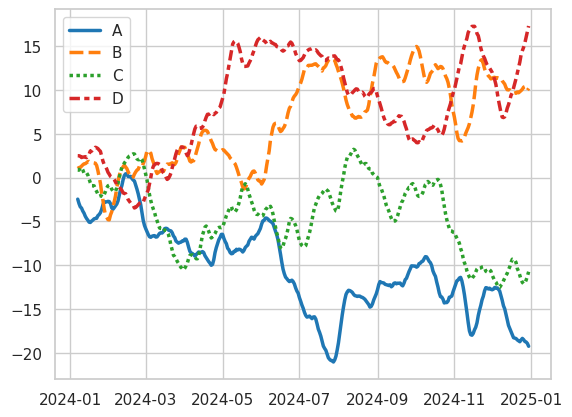

In [ ]:

sns.set_theme(style="whitegrid")

# Generating Random Data
rs = np.random.RandomState(365)

# Generate 365 rows and 4 columns of random numbers,
# then calculate the cumulative sum along the rows (axis=0) to create a time series pattern
values = rs.randn(365, 4).cumsum(axis=0)

# Create one year's range starting from January 1, 2024
dates = pd.date_range("1 1 2024",
                      periods=365,
                      freq="D" # with a daily frequency ("D")
                      )

data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])

# Smoothing the Data
# Apply a rolling average with a window of 7 days to the data DataFrame
data = data.rolling(7).mean()

# Creating the Line Chart
sns.lineplot(data=data, palette="tab10", linewidth=2.5)

🥊 Challenge: 🌞 Visualizing Vancouver's Temperature Trend in 2024 🌨 🥶

💡 Tip: The Meteostat Data Source and Python Library

Meteostat is a weather and climate database providing detailed weather data for thousands of weather stations and places worldwide.

The Meteostat Python library provides simple access to open weather and climate data using Pandas.

Historical observations and statistics are obtained from Meteostat's bulk data interface and consist of data provided by different public interfaces, most of which are governmental.


In [ ]:


# Set time period
start = datetime(2024, 1, 1)
end = datetime(2024, 12, 31)

# Create Point for Vancouver, BC
location = Point(49.2497, -123.1193, 70)

# Get daily data for 2024
data = Daily(location, start, end)
data = data.fetch()

In [ ]:
data.head()

tavg  tmin  tmax  prcp  snow   wdir  wspd   wpgt    pres  tsun
time                                                                      
2024-01-01   5.3   3.2   7.5   0.0   NaN   35.0   5.1    NaN  1023.0   NaN
2024-01-02   6.5   5.3   7.8   7.0   NaN   64.0   9.5    NaN  1015.4   NaN
2024-01-03   7.9   6.6   9.2   1.3   NaN   82.0  10.4    NaN  1015.0   NaN
2024-01-04   7.1   6.1   8.1  20.4   NaN   79.0  14.3  129.6  1019.2   NaN
2024-01-05   6.6   5.6   7.6   8.5   NaN  112.0  20.8  208.8  1018.5   NaN

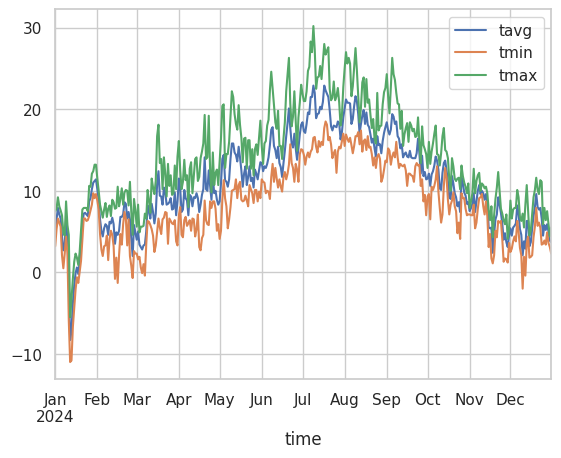

In [ ]:
# Plot line chart including average, minimum and maximum temperature
data.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()

📖 Documentation: [Seaborn - Time Series](https://seaborn.pydata.org/examples/timeseries_facets.html)

📖 Documentation: [Seaborn - Wide Data Lineplot](https://seaborn.pydata.org/examples/wide_data_lineplot.html)

📖 Documentation: [Reference: Plotly](https://plotly.com/python/time-series/)


#### Interactive Temproal Visualzation: Mixtures of Period data, Range Slider, Range Selector Buttons, Zoom Level[link text](https://)

🥊 Challenge: 🌞 Interactively Visualizing Delhi's Temperature Change
 🌨 🥶

In [ ]:
# load data
data = pd.read_csv("https://raw.githubusercontent.com/taraliu23/Urban-Data-Science/refs/heads/main/data/DailyDelhiClimateTrain.csv")

# convert the values in "date" column from text strings to datetime objects
data["date"] = pd.to_datetime(data["date"], format = '%Y-%m-%d')

# creates a new column "year"
# then extracts the year from the "date" column(datetime objects) using .dt.year
data["year"] = data["date"].dt.year

# creates a new column "month"
# then extracts the month from the "date" column(datetime objects) using .dt.month
data["month"] = data["date"].dt.month

# display the first five rows of the data
print(data.head())

        date   meantemp   humidity  wind_speed  meanpressure  year  month
0 2013-01-01  10.000000  84.500000    0.000000   1015.666667  2013      1
1 2013-01-02   7.400000  92.000000    2.980000   1017.800000  2013      1
2 2013-01-03   7.166667  87.000000    4.633333   1018.666667  2013      1
3 2013-01-04   8.666667  71.333333    1.233333   1017.166667  2013      1
4 2013-01-05   6.000000  86.833333    3.700000   1016.500000  2013      1


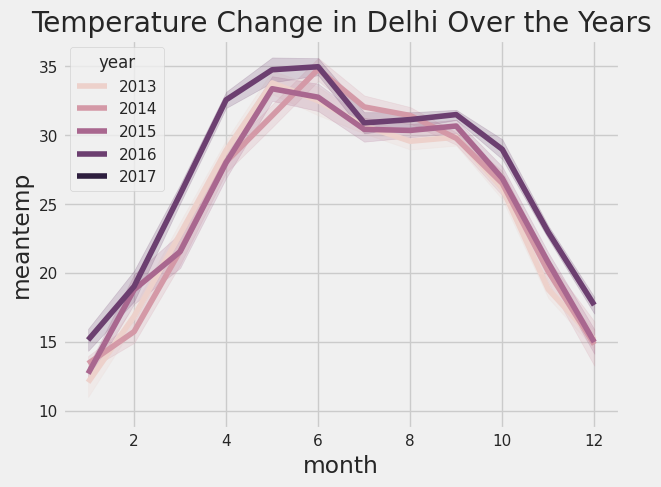

In [ ]:
sns.set_theme(
    style="white", # chooses a white background for the plot
    context="notebook" # optimizes the display appearance  within a Jupyter notebook
              )

# set customize plot style
plt.style.use('fivethirtyeight')

plt.title("Temperature Change in Delhi Over the Years")

# creates the line chart
sns.lineplot(data = data,
             x='month',
             y='meantemp',
             hue='year' # use 'year' column to create separate lines for different years, each distinguished by color
             )

plt.show()

In [ ]:
forecast_data = data.rename(columns = {"date": "ds",
                                       "meantemp": "y"})
print(forecast_data)

             ds          y    humidity  wind_speed  meanpressure  year  month
0    2013-01-01  10.000000   84.500000    0.000000   1015.666667  2013      1
1    2013-01-02   7.400000   92.000000    2.980000   1017.800000  2013      1
2    2013-01-03   7.166667   87.000000    4.633333   1018.666667  2013      1
3    2013-01-04   8.666667   71.333333    1.233333   1017.166667  2013      1
4    2013-01-05   6.000000   86.833333    3.700000   1016.500000  2013      1
...         ...        ...         ...         ...           ...   ...    ...
1457 2016-12-28  17.217391   68.043478    3.547826   1015.565217  2016     12
1458 2016-12-29  15.238095   87.857143    6.000000   1016.904762  2016     12
1459 2016-12-30  14.095238   89.666667    6.266667   1017.904762  2016     12
1460 2016-12-31  15.052632   87.000000    7.325000   1016.100000  2016     12
1461 2017-01-01  10.000000  100.000000    0.000000   1016.000000  2017      1

[1462 rows x 7 columns]



🥊 Challenge: 🌞 Forecasting Delhi's Temperature and Visualizing Interactively
 🌨 🥶

In [ ]:
# # Prophet library is a time series forecasting tool developed by Meta
# from prophet import Prophet
# from prophet.plot import plot_plotly, plot_components_plotly

# initialize a new Prophet model with default settings
model = Prophet()

# the Prophet model is trained using historical temperature data stored in the forecast_data DataFrame
# This DataFrame needs to have two columns: 'ds' (datestamp) and 'y' (the values to be forecasted - in our case, temperature).
model.fit(forecast_data)

# generates a DataFrame containing future dates for the forecast
# periods=365 means that the forecast will extend 365 days into the future
forecasts = model.make_future_dataframe(periods=365)
# results are stored in the predictions DataFrame
predictions = model.predict(forecasts)

# reate an interactive Plotly visualization of the forecast
plot_plotly(model, predictions)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpughhp213/6dcpvkio.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpughhp213/s2sh13b2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53194', 'data', 'file=/tmp/tmpughhp213/6dcpvkio.json', 'init=/tmp/tmpughhp213/s2sh13b2.json', 'output', 'file=/tmp/tmpughhp213/prophet_modelebfhxv2j/prophet_model-20250124142304.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:23:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:23:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



📖 Documentation: [Weather Forecasting Using Python](https://thecleverprogrammer.com/2022/10/17/weather-forecasting-using-python/)

🥊 Challenge: 🌐 Visualizing Connections between Countries 🌎 🌏 🌍

In [ ]:

df = px.data.gapminder().query("year == 2007")

df.head(10)

country continent  year  lifeExp        pop     gdpPercap iso_alpha  \
11   Afghanistan      Asia  2007   43.828   31889923    974.580338       AFG   
23       Albania    Europe  2007   76.423    3600523   5937.029526       ALB   
35       Algeria    Africa  2007   72.301   33333216   6223.367465       DZA   
47        Angola    Africa  2007   42.731   12420476   4797.231267       AGO   
59     Argentina  Americas  2007   75.320   40301927  12779.379640       ARG   
71     Australia   Oceania  2007   81.235   20434176  34435.367440       AUS   
83       Austria    Europe  2007   79.829    8199783  36126.492700       AUT   
95       Bahrain      Asia  2007   75.635     708573  29796.048340       BHR   
107   Bangladesh      Asia  2007   64.062  150448339   1391.253792       BGD   
119      Belgium    Europe  2007   79.441   10392226  33692.605080       BEL   

     iso_num  
11         4  
23         8  
35        12  
47        24  
59        32  
71        36  
83        40  
95        48  
107       50  
119       56

In [ ]:




fig = px.line_geo(df, locations="iso_alpha",
                  color="continent", # "continent" is one of the columns of gapminder
                  projection="orthographic")

fig.show()



📖 Documentation: [Plotly - Lines on Maps](https://plotly.com/python/lines-on-maps/)



🥊 Challenge: Creating 3D Map of Vancouver

In [ ]:

DATA_URL = "https://raw.githubusercontent.com/visgl/deck.gl-data/master/examples/geojson/vancouver-blocks.json"
LAND_COVER = [[[-123.0, 49.196], [-123.0, 49.324], [-123.306, 49.324], [-123.306, 49.196]]]

# initial view of the 3D map
INITIAL_VIEW_STATE = pydeck.ViewState(
  latitude=49.254,
  longitude=-123.13,
  zoom=11,
  max_zoom=16,
  pitch=45, # set the viewing angle (tilt) of the map
  bearing=0 # set the rotation of the map
)

polygon = pydeck.Layer(
    'PolygonLayer',
    LAND_COVER,
    stroked=False, # outlines of the blocks won't be drawn
    # processes the data as a flat longitude-latitude pair
    get_polygon='-',
    get_fill_color=[0, 0, 0, 20]
)

geojson = pydeck.Layer(
    'GeoJsonLayer',
    DATA_URL,
    opacity=0.8,
    stroked=False,
    filled=True,
    extruded=True,
    wireframe=True,
    get_elevation='properties.valuePerSqm / 20',
    get_fill_color='[255, 255, properties.growth * 255]',
    get_line_color=[255, 255, 255],
    pickable=True
)

r = pydeck.Deck(
    layers=[polygon, geojson],
    initial_view_state=INITIAL_VIEW_STATE)

# gnerate the HTML code for the visualization
r.to_html()

<IPython.core.display.Javascript object>


📖 Documentation: [Deck.gl](https://deckgl.readthedocs.io/en/latest/layer.html)

🥊 Challenge: Creating Maps with Cartographic Elements - Georgia Area Choropleth Map

Firstly, download `Georgia_Counties.geojson` file from [here](https://hub.arcgis.com/datasets/SAGIS::georgia-counties/about).

Then, drag your `Georgia_Counties.geojson` to the Files folder on the left.

In [ ]:
Image()

In [ ]:

gdf = gpd.read_file('/content/Georgia_Counties.geojson')

#### Create a Map using EOMaps

Initialize a map with a CRS.

Reference: [`eomaps.Maps()`](https://eomaps.readthedocs.io/en/latest/generated/eomaps.eomaps.Maps.html#eomaps.eomaps.Maps)

In [ ]:

m = Maps(crs=Maps.CRS.Orthographic(-85, 35), figsize=(7, 8))


In [ ]:
# Set the map extent
xmin, ymin, xmax, ymax = gdf.total_bounds
buffer = 1.5
m.set_extent([xmin-buffer, xmax+buffer, ymin-buffer, ymax+buffer])


Add the gridlines.

Reference: [`eomaps.Maps.add_gridlines()`](https://eomaps.readthedocs.io/en/latest/generated/eomaps.eomaps.Maps.add_gridlines.html)


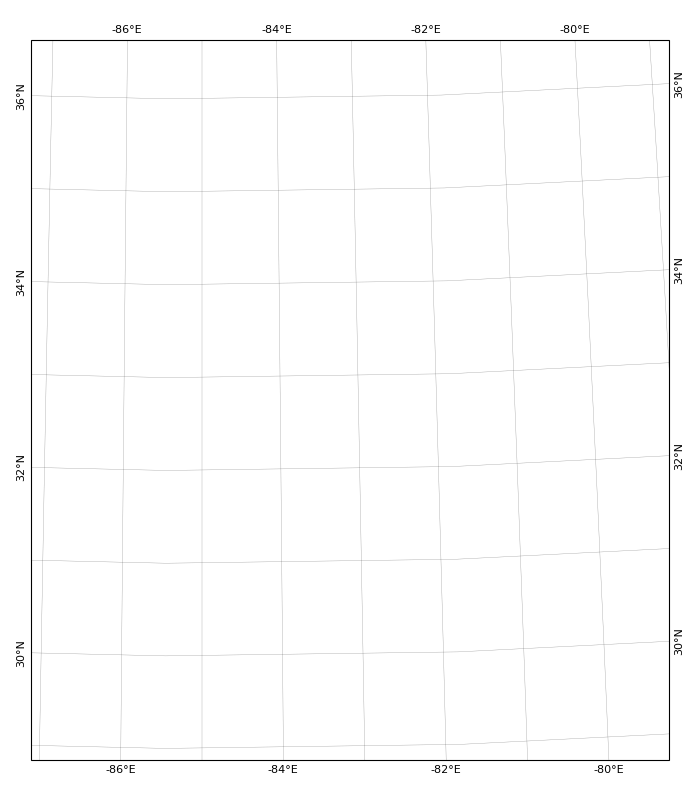

In [ ]:
g = m.add_gridlines(1, lw=0.25, alpha=0.5, zorder=0)
gl = g.add_labels(fontsize=8, every = 2)
m.show()

Add North Arrow.

Reference: [`eomaps.Maps.add_compass()`](https://eomaps.readthedocs.io/en/latest/generated/eomaps.eomaps.Maps.add_compass.html#eomaps.eomaps.Maps.add_compass)

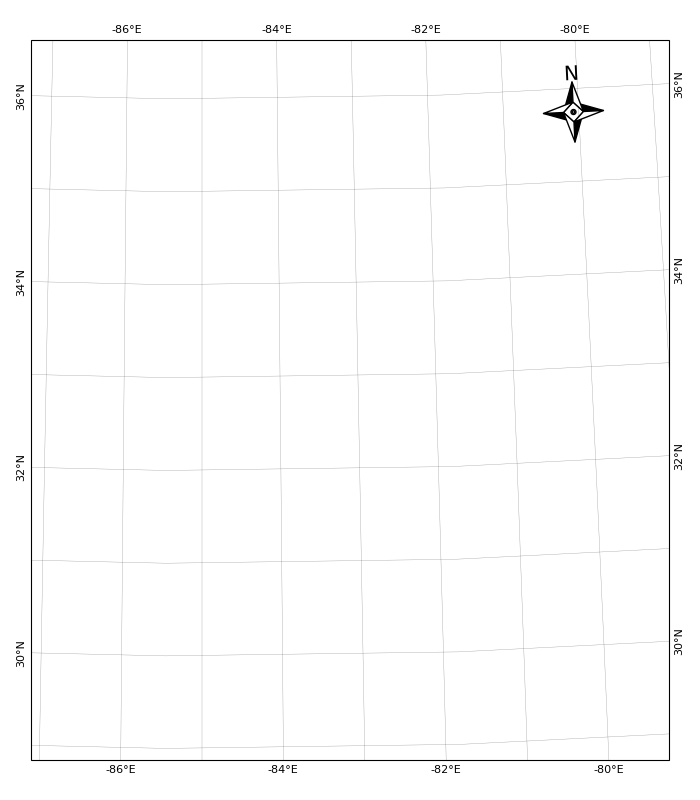

In [ ]:
c = m.add_compass(style='compass', pos=(0.85, 0.9))


m.show()

Add scalebar.

Reference: [`eomaps.Maps.add_scalebar()`](https://eomaps.readthedocs.io/en/latest/generated/eomaps.eomaps.Maps.add_scalebar.html)

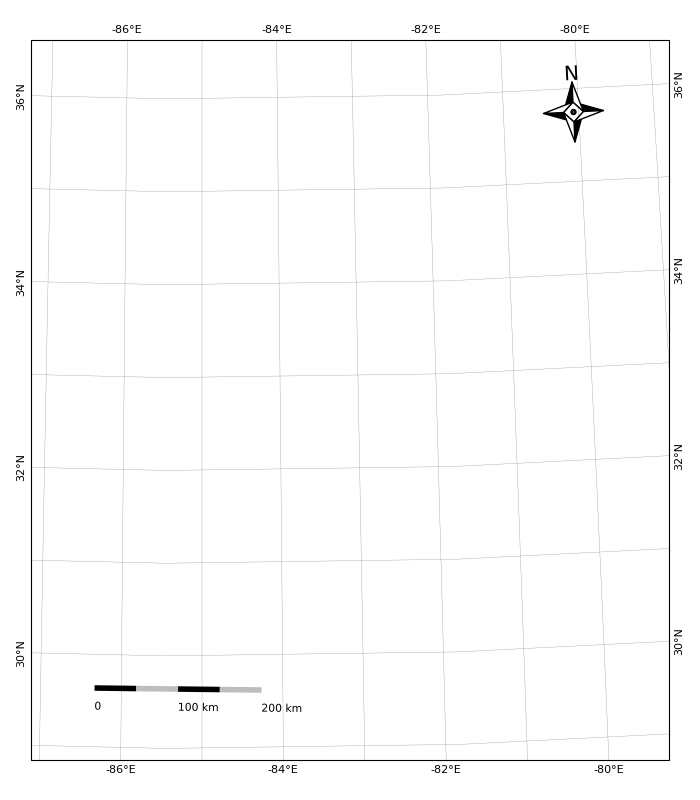

In [ ]:
s = m.add_scalebar(
    n=4,
    scale=50000,
    auto_position=(0.1,0.1),
    preset='bw',
    rotation=90,
    label_props={'rotation':90, 'offset':1.5, 'weight':0.5},
    scale_props={'colors': ('k','#bdbdbd','k','#bdbdbd','k')},
    line_props={'lw':0, 'ls': 'solid'}
)
m.show()


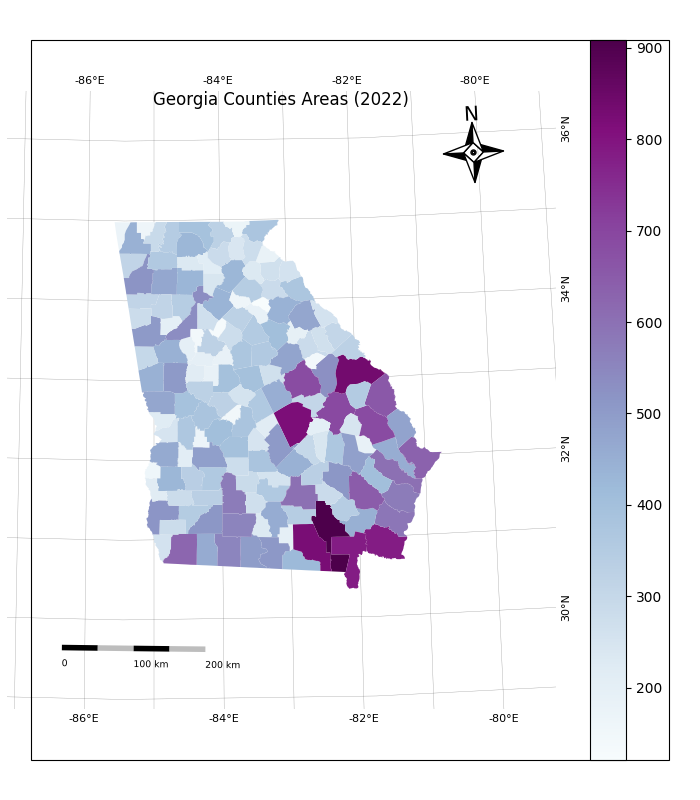

In [ ]:
bins = np.linspace(gdf["Acres"].min(), gdf["Acres"].max(), 6)

# plot GeoDataFrame
m.add_gdf(gdf,
          column='Sq_Miles',
          cmap='BuPu',
            linewidth=0.5,
          legend=True
)


m.add_title('Georgia Counties Areas (2022)', y=0.97)


m.show()

In [ ]:
# Save the map
output_folder = 'output'
output_path = os.path.join(output_folder, 'map.png')
m.savefig(output_path, dpi=300)

📖 Documentation:[Spatial Thoughts - Python DataViz](https://courses.spatialthoughts.com/python-dataviz.html)

📖 Documentation: [Supplement Cartographic Elements](https://colab.research.google.com/github/spatialthoughts/python-dataviz-web/blob/main/supplement_cartographic_elements.ipynb#scrollTo=e59f2b5d-e9d5-4a62-91ef-d583118e6b36)